In [ ]:
!git clone https://github.com/AlexeyAB/darknet.git
%cd darknet
!make


In [2]:
!./darknet


usage: ./darknet <function>


In [ ]:
!wget http://images.cocodataset.org/zips/train2017.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip


In [ ]:
!unzip train2017.zip -d data/coco/
!unzip annotations_trainval2017.zip -d data/coco/


In [5]:
!cp cfg/yolov3-spp.cfg cfg/yolov3-spp_custom.cfg


In [6]:
!find $(pwd)/data/coco/train2017 -type f -name "*.jpg" > data/coco/train.txt


In [7]:
!find $(pwd)/data/coco/val.txt -type f -name "*.jpg" > data/coco/val.txt


In [ ]:
!cat data/coco/train.txt


In [9]:
!find $(pwd)/data/coco/train2017 -type f -name "*.jpg" > /content/darknet/data/coco/train.txt


In [11]:
def generate_coco_data(classes, classes_path, train_path, valid_path, backup_path, output_path="coco.data"):
    """
    Gera o arquivo coco.data no formato especificado.

    Args:
        classes_path (str): Caminho para o arquivo contendo as classes (coco.names).
        train_path (str): Caminho para o arquivo train.txt.
        valid_path (str): Caminho para o arquivo valid.txt.
        backup_path (str): Caminho onde os pesos treinados serão salvos.
        output_path (str): Caminho para salvar o coco.data gerado (padrão: coco.data).
    """
    content = f"""classes= {sum(1 for _ in open(classes_path))}
train  = {train_path}
valid  = {valid_path}
names  = {classes_path}
backup = {backup_path}
"""
    with open(output_path, "w") as f:
        f.write(content)
    print(f"Arquivo coco.data gerado em: {output_path}")

# Exemplo de uso:
generate_coco_data(
    classes = 2,
    classes_path="/content/darknet/data/coco.names",
    train_path="/content/darknet/data/coco/train.txt",
    valid_path="/content/darknet/data/coco/val.txt",
    backup_path="/content/darknet/backup"
)


Arquivo coco.data gerado em: coco.data


In [ ]:
!./darknet detector train data/coco.data cfg/yolov3-spp_custom.cfg /content/darknet/cfg/yolov3-spp.weights # precisa-se upar os pesos do treinamento

In [ ]:
!./darknet detector train data/coco.data cfg/yolov3-spp_custom.cfg /content/darknet/cfg/yolov3-spp.weights > training_log.txt


In [17]:
!grep "Loss" training_log.txt > loss_data.txt


In [18]:
# Ler o arquivo de log para extrair as perdas
with open('training_log.txt', 'r') as file:
    lines = file.readlines()

# Filtrar as linhas com a palavra 'Loss'
losses = [line.split() for line in lines if "Loss" in line]

# Exibir as perdas
print(losses[:10])  # Exibe as 10 primeiras entradas


[]


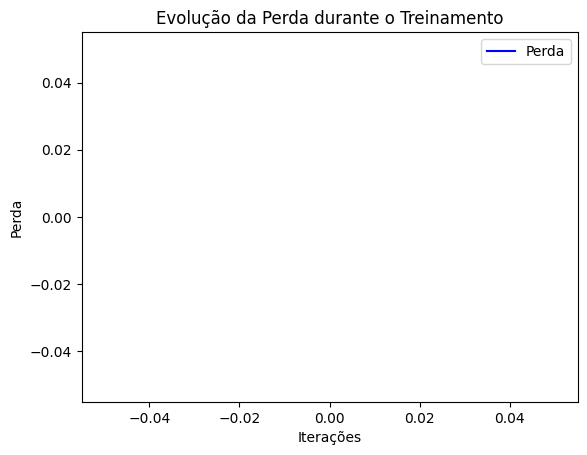

In [19]:
import matplotlib.pyplot as plt

# Extraindo as perdas do arquivo de log
iterations = [i for i in range(len(losses))]
loss_values = [float(loss[3]) for loss in losses]  # A perda geralmente está na 4ª posição

# Criando o gráfico
plt.plot(iterations, loss_values, label="Perda", color='blue')
plt.xlabel("Iterações")
plt.ylabel("Perda")
plt.title("Evolução da Perda durante o Treinamento")
plt.legend()
plt.show()


In [20]:
!apt-get install -y libopencv-dev


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libopencv-dev is already the newest version (4.5.4+dfsg-9ubuntu4+jammy0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!cd /content/darknet && make clean && make OPENCV=1


In [ ]:
!./darknet detector test data/coco.data cfg/yolov3-spp_custom.cfg /content/darknet/cfg/yolov3-spp.weights data/test_images/test2.jpg # lemebre-se de criar a pasta


In [ ]:
!./darknet detector test data/coco.data cfg/yolov3-spp_custom.cfg /content/darknet/cfg/yolov3-spp.weights data/test_images/test3.jpeg


In [27]:
!mv predictions.jpg /content/darknet/data/detected_images


In [29]:
import os
import subprocess

# Diretórios
input_dir = "/content/darknet/data/test_images"
output_dir = "/content/darknet/data/detected_images"
os.makedirs(output_dir, exist_ok=True)

# Lista de imagens no diretório de entrada
images = [img for img in os.listdir(input_dir) if img.endswith(('.jpg', '.png','.jpeg'))]

for image in images:
    input_path = os.path.join(input_dir, image)
    output_path = os.path.join(output_dir, image)

    # Executa o Darknet para cada imagem
    command = [
        "./darknet", "detector", "test", "data/coco.data",
        "cfg/yolov3-spp_custom.cfg", "/content/darknet/cfg/yolov3-spp.weights",
        input_path
    ]
    subprocess.run(command)

    # Move a saída para o diretório de destino
    if os.path.exists("predictions.jpg"):
        os.rename("predictions.jpg", output_path)
        print(f"Imagem processada e salva: {output_path}")


Imagem processada e salva: /content/darknet/data/detected_images/test3.jpeg
Imagem processada e salva: /content/darknet/data/detected_images/test2.jpg


Exibindo imagens da pasta test_images...


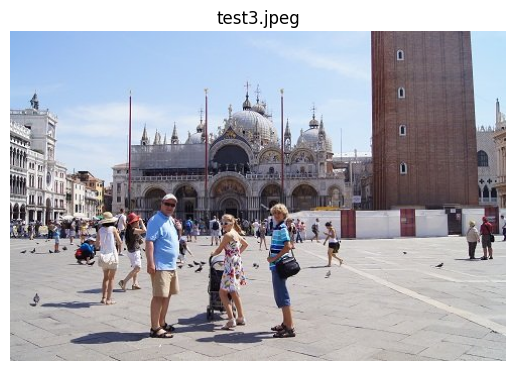

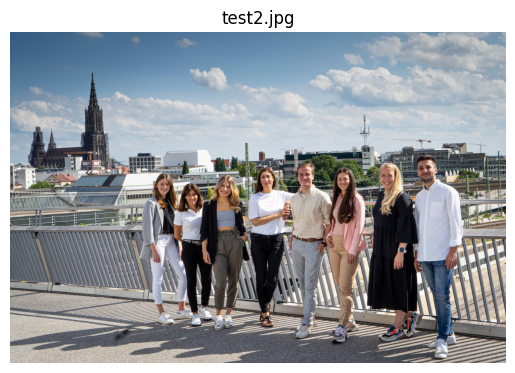

Exibindo imagens da pasta detected_images...


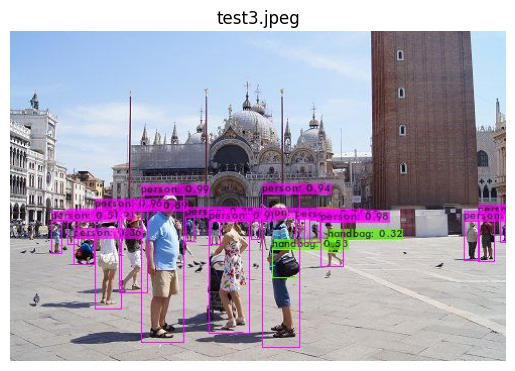

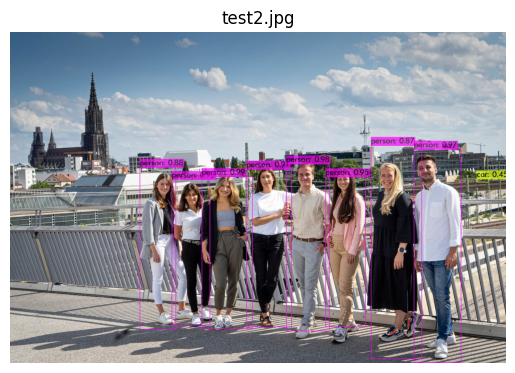

In [32]:
import os
import cv2
from matplotlib import pyplot as plt

# Caminhos das pastas
test_images_dir = '/content/darknet/data/test_images'
detected_images_dir = '/content/darknet/data/detected_images'

# Função para exibir imagens
def show_images_from_folder(folder_path):
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if img_path.endswith('.jpg') or img_path.endswith('.png') or img_path.endswith('.jpeg'):
            img = cv2.imread(img_path)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img_rgb)
            plt.title(filename)
            plt.axis('off')  # Não exibe os eixos
            plt.show()

# Exibindo imagens de ambas as pastas
print("Exibindo imagens da pasta test_images...")
show_images_from_folder(test_images_dir)

print("Exibindo imagens da pasta detected_images...")
show_images_from_folder(detected_images_dir)
